In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pyTVDN.TVDNutils import GetBsplineEst
from scipy.signal import detrend
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

## Obtain the dataset

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection with No Bspline

1. Detrend the observation
2. No B-spline
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [6]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=50, Lmin=1, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 1,
 'MaxM': 50,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [7]:
fMRIdetNoSpl._Preprocess()

In [8]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

In [9]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [10]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [11]:
fMRIdetNoSpl()

In [12]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

In [13]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.2000000000000002
The optimal number of change point under the range of kappa we speicified is: 0
The optimal number of change point is: 10


In [14]:
fMRIdetNoSpl.UpdateEcpts(40)
print(fMRIdetNoSpl)

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      40     | [  3.   6.  10.  14.  18.  22.  26.  27.  31.  32.  36.  40.  44.  48. | 1.5678643467622815 |  6   |
|             |   52.  89.  93.  97. 101. 105. 108. 112. 116. 120. 124. 128. 132. 136. |                    |      |
|             |      139. 142. 146. 150. 154. 158. 159. 160. 165. 169. 173. 176.]      |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [48  2 60 76  9].


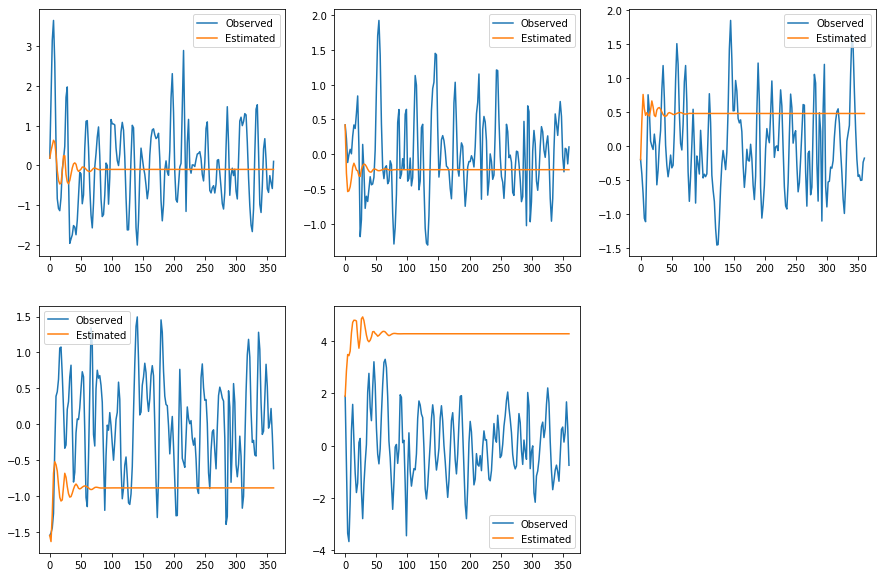

In [15]:
fMRIdetNoSpl.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [16]:
fMRIdetNoSpl.RecResCur.EstXmatReal = detrend(fMRIdetNoSpl.RecResCur.EstXmatReal)

The plot indices are [48, 2, 60, 76, 9].


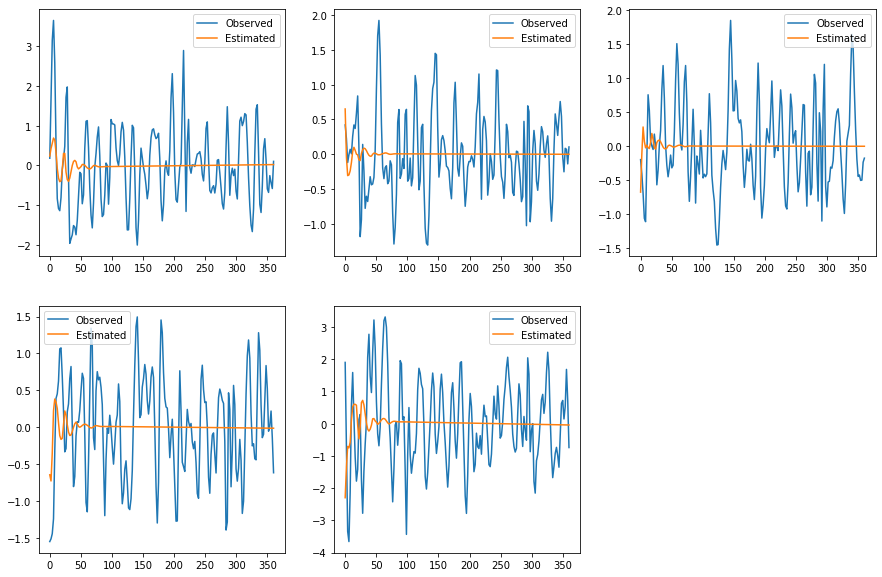

In [17]:
fMRIdetNoSpl.PlotRecCurve(idxs=[48, 2, 60, 76, 9])

## 2. Detection with  B-spline seperate on `Xmat` and `dXmat`

2. Detrend the observation
1. Do b-spline seperately on `Xmat`(`1e-6`) and `dXmat`(`8e-5`)
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [25]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=40, Lmin=2, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 2,
 'MaxM': 40,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [26]:
fMRIdet._Preprocess()

In [27]:
d, n = fMRIdet.nYmat.shape
T = fMRIdet.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdet.nYmat

In [28]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdet.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [29]:
_, Xmat = GetBsplineEst(Xmat, time, lamb=1e-6)
_, dXmat = GetBsplineEst(dXmat, time, lamb=8e-5)

In [30]:
fMRIdet.dXmat, fMRIdet.Xmat = dXmat, Xmat

In [31]:
fMRIdet()

In [32]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [33]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.3500000000000003
The optimal number of change point under the range of kappa we speicified is: 8
The optimal number of change point is: 10


In [34]:
fMRIdet.UpdateEcpts(40)
print(fMRIdet)

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      40     | [  2.   5.   7.   9.  11.  13.  15.  21.  23.  29.  35.  37.  43.  45. | 1.4663188184939313 |  6   |
|             |   51.  53.  59.  65.  67.  69.  75.  81.  87.  93.  99. 105. 111. 117. |                    |      |
|             |      119. 125. 131. 137. 143. 149. 151. 158. 164. 170. 172. 178.]      |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [ 7 38 49 16 19].


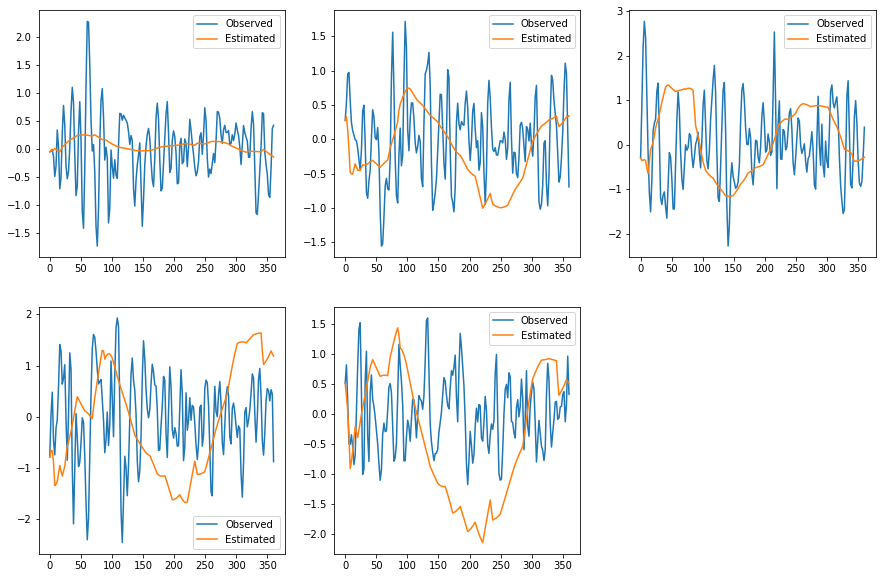

In [35]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [36]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [7, 38, 49, 16, 19].


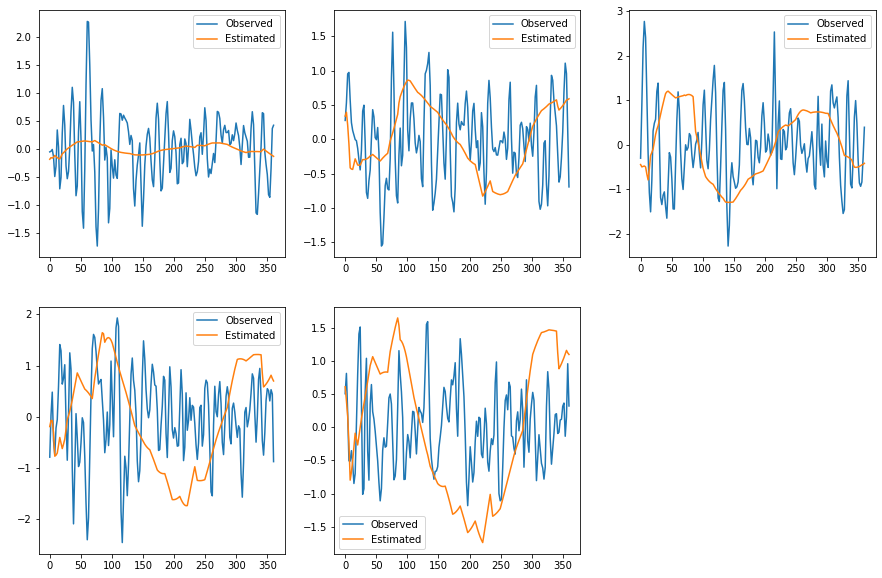

In [37]:
fMRIdet.PlotRecCurve(idxs=[7, 38, 49, 16, 19])

## 3. Detection with  B-spline  (`8e-5`)

1. Detrend the observation
2. B-spline with `8e-5`
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [48]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=40, Lmin=2, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 2,
 'MaxM': 40,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [49]:
fMRIdet()

In [40]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [41]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.5700000000000005
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


In [42]:
fMRIdet.UpdateEcpts(40)
print(fMRIdet)

+-------------+------------------------------------------------------------------------+-------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE        | Rank |
+-------------+------------------------------------------------------------------------+-------------------+------+
|      40     | [  5.   7.   9.  15.  21.  23.  25.  27.  33.  39.  41.  43.  48.  54. | 1.665181264125976 |  6   |
|             |   60.  66.  68.  70.  76.  82.  84.  90.  96. 102. 108. 110. 116. 119. |                   |      |
|             |      125. 127. 133. 139. 141. 147. 153. 159. 161. 166. 172. 178.]      |                   |      |
+-------------+------------------------------------------------------------------------+-------------------+------+


### No detrended reconstructed curve

The plot indices are [51 89 84 73 40].


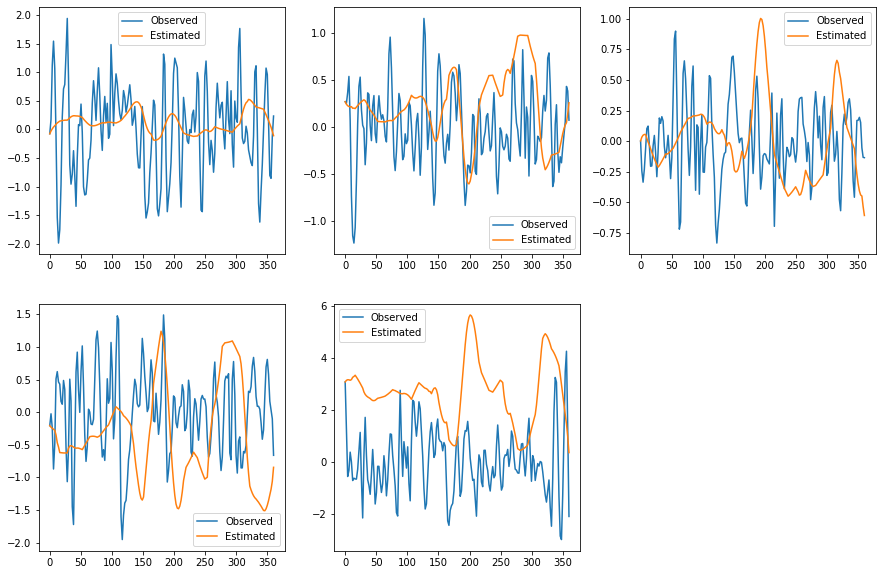

In [43]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [44]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [51, 89, 84, 73, 40].


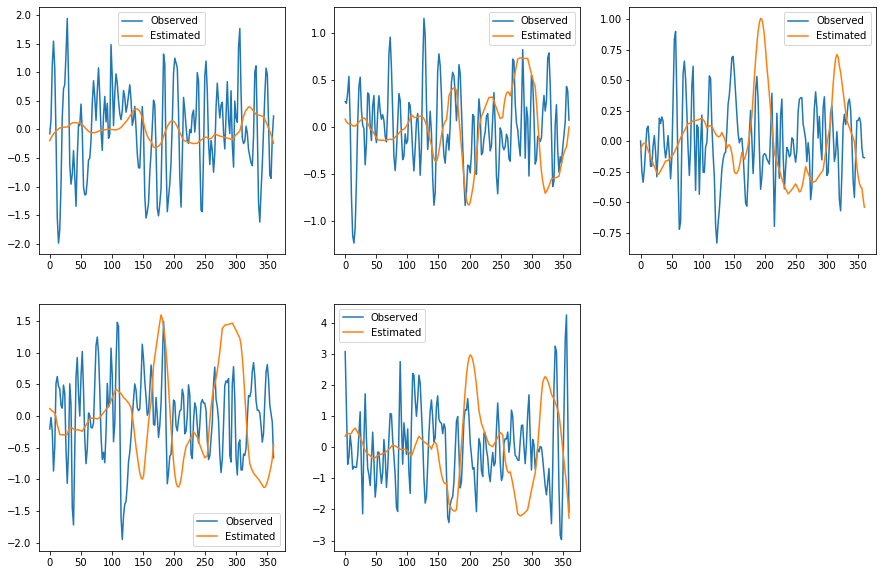

In [45]:
fMRIdet.PlotRecCurve(idxs=[51, 89, 84, 73, 40])